# Doctor's Consultation Fee

In [1]:
#Importing important liberaries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing excel files using pandas
train_data = pd.read_excel("Final_Train.xlsx")
test_data = pd.read_excel("Final_Test.xlsx")

In [3]:
train_data.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [4]:
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


Concating two dataframes into one dataframe.

In [5]:
#Concating train and test data
train_data['Source']='train'
test_data['Source']='test'
df=pd.concat([train_data,test_data], ignore_index=True)

In [6]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train


In [7]:
#Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
 7   Source              7948 non-null   object 
dtypes: float64(1), object(7)
memory usage: 496.9+ KB


# Summary Statistics

In [8]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Observation :

Fees is the only column which is float value other than that all columns are object.

In [9]:
#Checking null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
Source                   0
dtype: int64

In [10]:
#Checking unique values
for uni_col in df.columns:
    if df[uni_col].dtypes=='object':
        print(uni_col)
        #print(df[uni_col].value_counts())
        print("Unique Values",df[uni_col].unique())
        print("count of unique values",df[uni_col].nunique())
        print('---------------------------------------------------------------------')

Qualification
Unique Values ['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine'
 'MBBS, MS - General Surgery, FAIS, FIAGES'
 'MBBS, MD / MS - Obstetrics & Gynaecology']
count of unique values 1801
---------------------------------------------------------------------
Experience
Unique Values ['24 years experience' '12 years experience' '9 years experience'
 '20 years experience' '8 years experience' '42 years experience'
 '10 years experience' '14 years experience' '23 years experience'
 '5 years experience' '7 years experience' '21 years experience'
 '19 years experience' '41 years experience' '31 years experience'
 '25 years experience' '16 years experience' '15 years experience'
 '11 years experience' '22 years experience' '38 years experience'
 '6 years experience' '36 years experience' '13 years experience'
 '18 years experience' '46 years experien

In [11]:
#Extracting number from Experience object
#Example 24 years => 24
df['Experience (Yrs)'] = df['Experience'].str.extract('(\d+)').astype(int)

In [12]:
#Dropping Experience column
df.drop(['Experience'], axis = 1, inplace = True)

In [13]:
#Information about Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Rating              3556 non-null   object 
 2   Place               7917 non-null   object 
 3   Profile             7948 non-null   object 
 4   Miscellaneous_Info  4494 non-null   object 
 5   Fees                5961 non-null   float64
 6   Source              7948 non-null   object 
 7   Experience (Yrs)    7948 non-null   int32  
dtypes: float64(1), int32(1), object(6)
memory usage: 465.8+ KB


In [14]:
df.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Source,Experience (Yrs)
0,"BHMS, MD - Homeopathy",100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,24
1,"BAMS, MD - Ayurveda Medicine",98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,12
2,"MBBS, MS - Otorhinolaryngology",NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train,9
3,"BSc - Zoology, BAMS",NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,12
4,BAMS,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,20


In [15]:
#Checking null values
df.isnull().sum()

Qualification            0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
Source                   0
Experience (Yrs)         0
dtype: int64

In [16]:
# Seperate Ratings into bins
df["Rating"].fillna("-99%",inplace=True)
df["Rating"] = df["Rating"].str[:-1].astype("int")

bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df["Rating"] = pd.cut(df["Rating"],bins=bins,labels=labels,include_lowest=True)

Changing rating values from 1 to 10.

Example : values between 90 to 100 new rating is 10.

In [17]:
df.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Source,Experience (Yrs)
0,"BHMS, MD - Homeopathy",10,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,24
1,"BAMS, MD - Ayurveda Medicine",10,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,12
2,"MBBS, MS - Otorhinolaryngology",0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train,9
3,"BSc - Zoology, BAMS",0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,12
4,BAMS,10,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,20


In [18]:
#Filling NaN values with unknown for missing places.
df['Place'].fillna('Unknown, Unknown', inplace=True)

In [19]:
#Splitting place into two columns 
df['Place']=df['Place'].str.split(',')
df['Locality']=df['Place'].str[0]
df['City']=df['Place'].str[-1]

In [20]:
df.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Source,Experience (Yrs),Locality,City
0,"BHMS, MD - Homeopathy",10,"[Kakkanad, Ernakulam]",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,24,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",10,"[Whitefield, Bangalore]",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,12,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",0,"[Mathikere - BEL, Bangalore]",ENT Specialist,NaN,300.0,train,9,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",0,"[Bannerghatta Road, Bangalore]",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,12,Bannerghatta Road,Bangalore
4,BAMS,10,"[Keelkattalai, Chennai]",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,20,Keelkattalai,Chennai


In [21]:
#Unique Values of Locality
df['Locality'].unique()

array(['Kakkanad', 'Whitefield', 'Mathikere - BEL', 'Bannerghatta Road',
       'Keelkattalai', 'Porur', 'Karol Bagh', 'Arekere', 'Old City',
       'Athani', 'Thousand Lights', 'Somajiguda', 'Coimbatore Racecourse',
       'Jubilee Hills', 'Kondli', 'Saroor Nagar', 'Tambaram West',
       'Purasawakkam', 'KPHB', 'HSR Layout', 'Pollachi',
       'Vasundhra Enclave', 'Chembur', 'Thammanam', 'Andheri', 'Pattom',
       'Kukatpally', 'Vadavalli', 'Defence Colony', 'Banjara Hills',
       'Sion West', 'CR Park', 'Mogappair East', 'IP Extension',
       'Safdarjung Enclave', 'New Friends Colony', 'Borivali West',
       'Saket', 'Malad', 'Hyder Nagar', 'Dahisar West', 'RT Nagar',
       'Powai', 'Basheerbagh', 'Musheerabad', 'AS Rao Nagar', 'Madhapur',
       'Gandhinagar', 'Chetpet', 'Vileparle East', 'Yelahanka New Town',
       'Kodambakkam', 'Malleswaram', 'Pallikaranai', 'Nallakunta',
       'Paschim Vihar', 'Meera Bagh', 'Chattarpur', 'Andheri West',
       'Himayat Nagar', 'Adambakka

In [22]:
#Unique Values of City
df['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', ' Unknown', 'e'],
      dtype=object)

Observation :

In above unique values there is a unique value 'e' which is irrelevant data.

So changing 'e' to 'Unknown'

In [23]:
#Finding index of e Locality and City
df[df['City']=='e']

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Source,Experience (Yrs),Locality,City
3980,BDS,0,[e],Dentist,NaN,250.0,train,23,e,e


In [24]:
#Changing index 3980 Locality and City value to Unknown
df['Locality'][3980]=' Unknown'
df['City'][3980]=' Unknown'

In [25]:
#Dropping place column
df.drop(['Place'], axis=1, inplace=True)

In [26]:
#Checking Miscellaneous_Info unique values
df['Miscellaneous_Info'].unique()

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', nan, ...,
       'General Dentistry Dental Fillings RCT - Single Sitting',
       '98% 240 Feedback Velachery, Chennai',
       'RCT - Root Canal Treatment Root Canal Treatment - Rotary Pyorrhoea Treatment'],
      dtype=object)

In [27]:
#Taking feedback count from Miscellaneous_Info
def feedback_count(fc):
    final = re.search(r' (.*?) Feedback',fc)
    if final:
        return int(final.group(1))
    else:
        return 0
df['Feedback']=df['Miscellaneous_Info'].apply(lambda f:feedback_count(f) if '%' in str(f) else 0)

In [28]:
df.head()

,Qualification,Rating,Profile,Miscellaneous_Info,Fees,Source,Experience (Yrs),Locality,City,Feedback
0,"BHMS, MD - Homeopathy",10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train,24,Kakkanad,Ernakulam,16
1,"BAMS, MD - Ayurveda Medicine",10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train,12,Whitefield,Bangalore,76
2,"MBBS, MS - Otorhinolaryngology",0,ENT Specialist,NaN,300.0,train,9,Mathikere - BEL,Bangalore,0
3,"BSc - Zoology, BAMS",0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train,12,Bannerghatta Road,Bangalore,0
4,BAMS,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train,20,Keelkattalai,Chennai,4


In [29]:
#Dropping Miscellaneous_Info column because other than feedback value we don't need anything in that column.
df.drop(['Miscellaneous_Info'], axis=1,inplace=True)

In [30]:
#Relevant Qualification

#Splitting qualification by removing comma
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
#Removing space in qualification value
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [31]:
print(Qualification)

{'BHMS': 998, 'MD - Homeopathy': 243, 'BAMS': 1007, 'MD - Ayurveda Medicine': 180, 'MBBS': 3788, 'MS - Otorhinolaryngology': 145, 'BSc - Zoology': 4, 'BDS': 1791, 'MD - General Medicine': 384, 'BSc': 6, 'MS': 2, 'DNB - ENT': 150, 'MDS': 103, 'MDS - Oral & Maxillofacial Surgery': 136, 'Diploma in Otorhinolaryngology (DLO)': 335, 'MF- Homeopathy': 6, 'MS - ENT': 539, 'DNB': 77, 'Fellowship of College of General Practice (FCGP)': 15, 'DDVL': 228, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 78, 'Diploma in Dermatology': 86, 'Fellowship in Aesthetic Medicine': 28, 'DM - Neurology': 7, 'MD - Pediatrics': 15, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 8, 'AFIH': 7, 'MDS - Prosthodontist And Crown Bridge': 66, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 12, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 62, 'MD - Dermatology': 802, 'Venereology & Leprosy': 388, 'MD

In [32]:
max_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qualification =[]
for tup in max_qua:
    final_qualification.append(tup[0])
for title in final_qualification:
    df[title]=0
#Separating into columns    
for x,y in zip(df["Qualification"].values,np.array([idx for idx in range(len(df))])):
    for fq in x:
        fq = fq.strip()
        if fq in final_qualification:
            df[fq][y] = 1

In [33]:
df.head(20)

,Qualification,Rating,Profile,Fees,Source,Experience (Yrs),Locality,City,Feedback,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",10,Homeopath,100.0,train,24,Kakkanad,Ernakulam,16,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",10,Ayurveda,350.0,train,12,Whitefield,Bangalore,76,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",0,ENT Specialist,300.0,train,9,Mathikere - BEL,Bangalore,0,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",0,Ayurveda,250.0,train,12,Bannerghatta Road,Bangalore,0,0,0,1,0,0,0,0,0,0,0
4,[BAMS],10,Ayurveda,250.0,train,20,Keelkattalai,Chennai,4,0,0,1,0,0,0,0,0,0,0
5,[BAMS],0,Ayurveda,100.0,train,8,Porur,Chennai,0,0,0,1,0,0,0,0,0,0,0
6,[BHMS],0,Homeopath,200.0,train,42,Karol Bagh,Delhi,0,0,0,0,1,0,0,0,0,0,0
7,[BDS],10,Dentist,200.0,train,10,Arekere,Bangalore,0,0,1,0,0,0,0,0,0,0,0
8,"[MBBS, MD - General Medicine]",0,General Medicine,100.0,train,14,Old City,Hyderabad,0,1,0,0,0,0,0,0,1,0,0
9,"[BSc, BDS]",0,Dentist,100.0,train,23,Athani,Ernakulam,0,0,1,0,0,0,0,0,0,0,0


In [34]:
#Dropping qualification column
df.drop(['Qualification'],axis=1,inplace=True)

In [35]:
#information about Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Rating                                7948 non-null   category
 1   Profile                               7948 non-null   object  
 2   Fees                                  5961 non-null   float64 
 3   Source                                7948 non-null   object  
 4   Experience (Yrs)                      7948 non-null   int32   
 5   Locality                              7948 non-null   object  
 6   City                                  7948 non-null   object  
 7   Feedback                              7948 non-null   int64   
 8   MBBS                                  7948 non-null   int64   
 9   BDS                                   7948 non-null   int64   
 10  BAMS                                  7948 non-null   int64   
 11  BHMS

## Summary Statistics

In [36]:
df.describe()

,Fees,Experience (Yrs),Feedback,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
count,5961.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000
mean,307.944640,17.446653,10.881354,0.476095,0.225214,0.126447,0.125315,0.100654,0.067816,0.048188,0.048314,0.042023,0.030574
std,190.920373,11.201217,52.602432,0.499460,0.417749,0.332373,0.331096,0.300889,0.251445,0.214177,0.214442,0.200655,0.172171
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,500.000000,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,950.000000,66.000000,1987.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observation :

All columns don't have null value except Fees because it has test data.

In [37]:
df.columns

Index(['Rating', 'Profile', 'Fees', 'Source', 'Experience (Yrs)', 'Locality',
       'City', 'Feedback', 'MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology',
       'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine',
       'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy'],
      dtype='object')

In [38]:
#Changing column position
df=df[['Profile', 'Experience (Yrs)', 'Rating', 'Locality',
       'City', 'Feedback', 'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'Source', 'Fees']]

# Splitting Data

In [40]:
#Seperating train and test data
train=df.loc[df['Source']=='train']
test=df.loc[df['Source']=='test']

In [41]:
#Dropping source and fees column
train.drop(['Source'],axis=1,inplace=True)
test.drop(['Source','Fees'],axis=1,inplace=True)

# Visualization

## Univariate Analysis

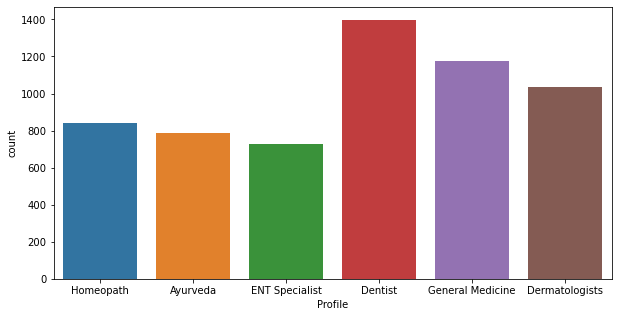

In [43]:
#Visualization of Profile count
plt.figure(figsize=(10,5))
sns.countplot(x='Profile',data=train)

Observation :

Dentist profile has maximum count, followed by General Medicine, Dermatologists profile.

ENT profile has minimum number of count.

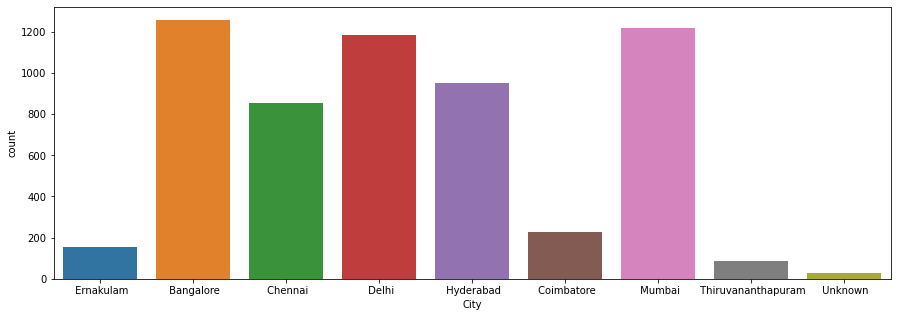

In [44]:
#Visualization of City count
plt.figure(figsize=(15,5))
sns.countplot(x='City',data=train)

Observation :

Bangalore, Delhi and Mumbai has maximum number of doctors.

Thiruvanathapuram has minimum number of doctors.

We have some unknown places in the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019573675C40>,
      dtype=object)

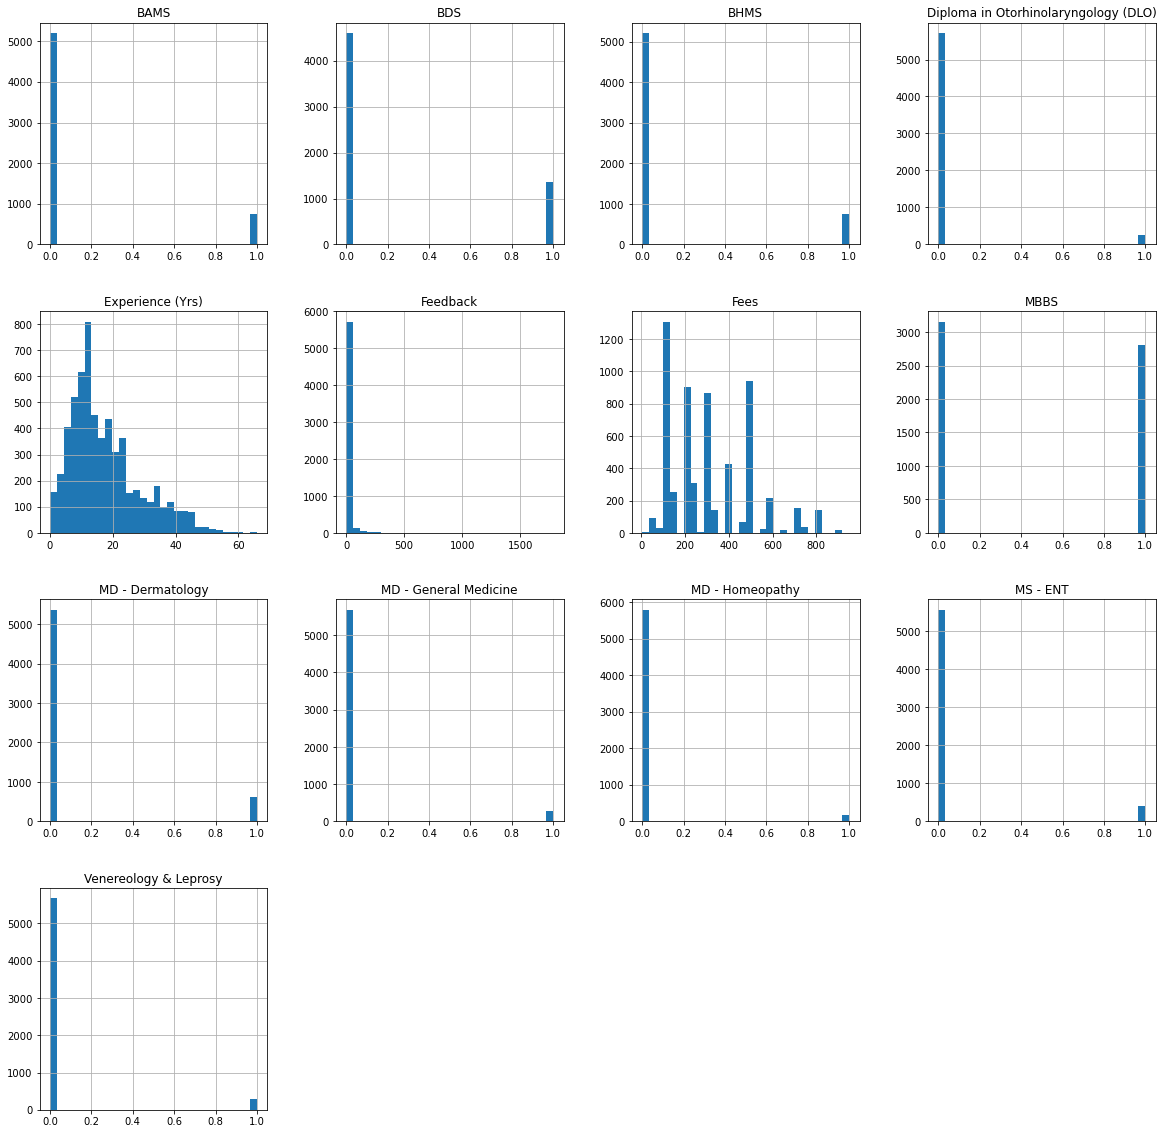

In [45]:
#Visualization of histogram for all columns except object datatype column
train.hist(figsize=(20,20),grid=True,bins=30)

Observation :

Experience data is slightly right skewed.

Rating is left skewed.

Other data have discrete values.

## Bivariate Analysis

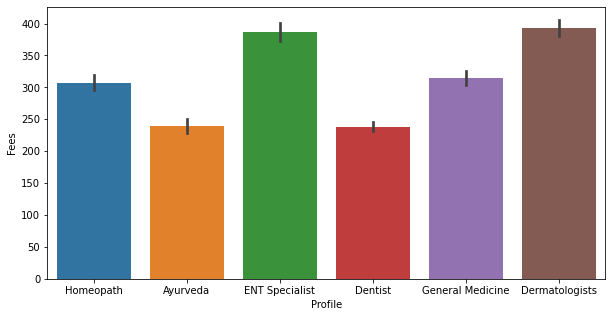

In [47]:
#Barplot visualization between Profile and Fees
plt.figure(figsize=(10,5))
sns.barplot(x='Profile', y='Fees', data=train)

Observation :

Dermatologists and ENT Specialist are getting fees around 400 Rupees, which is higher compare to other profile. 

Dentist and Ayurvedha are getting fees around 250 Rupees, which is lower compare to other profile.

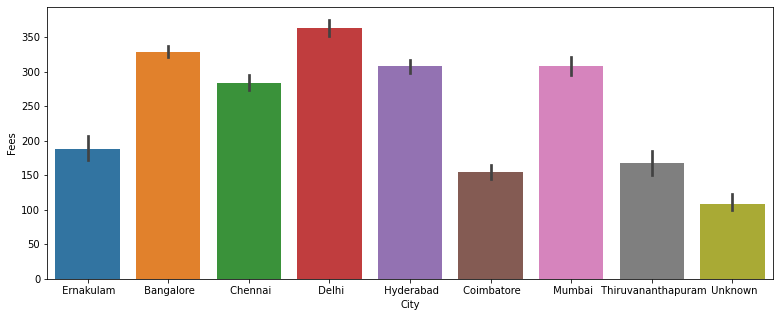

In [48]:
#Barplot visualization between City and Fees
plt.figure(figsize=(13,5))
sns.barplot(x='City', y='Fees', data=train)

Observation :

Delhi doctors getting fees around 450 which is higher compare to other cities, followed by bangalore, Mumbai and Hyderbad.

Coimbatore doctors getting around 150 which is lower compare to other cities.

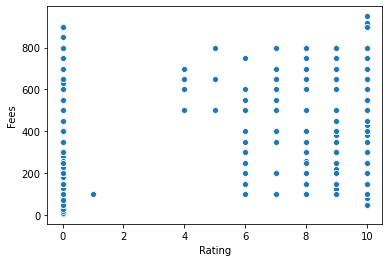

In [49]:
#Scatterplot visualization between Rating and Fees
sns.scatterplot(x='Rating', y='Fees', data=train)

Observation :

Fees is higher when rating is around 50%.

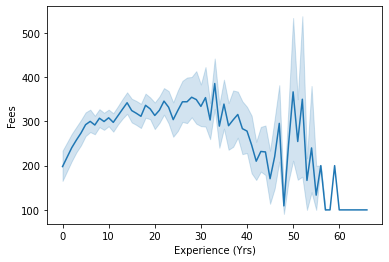

In [50]:
#Lineplot visualization between Experience and Fees
sns.lineplot(x='Experience (Yrs)', y='Fees', data=train)

Observation :

Doctor who has experience around 30 to 35 are getting higher fees.

Doctor who has experience around 45 to 50 are getting lower fees.

# Correlation

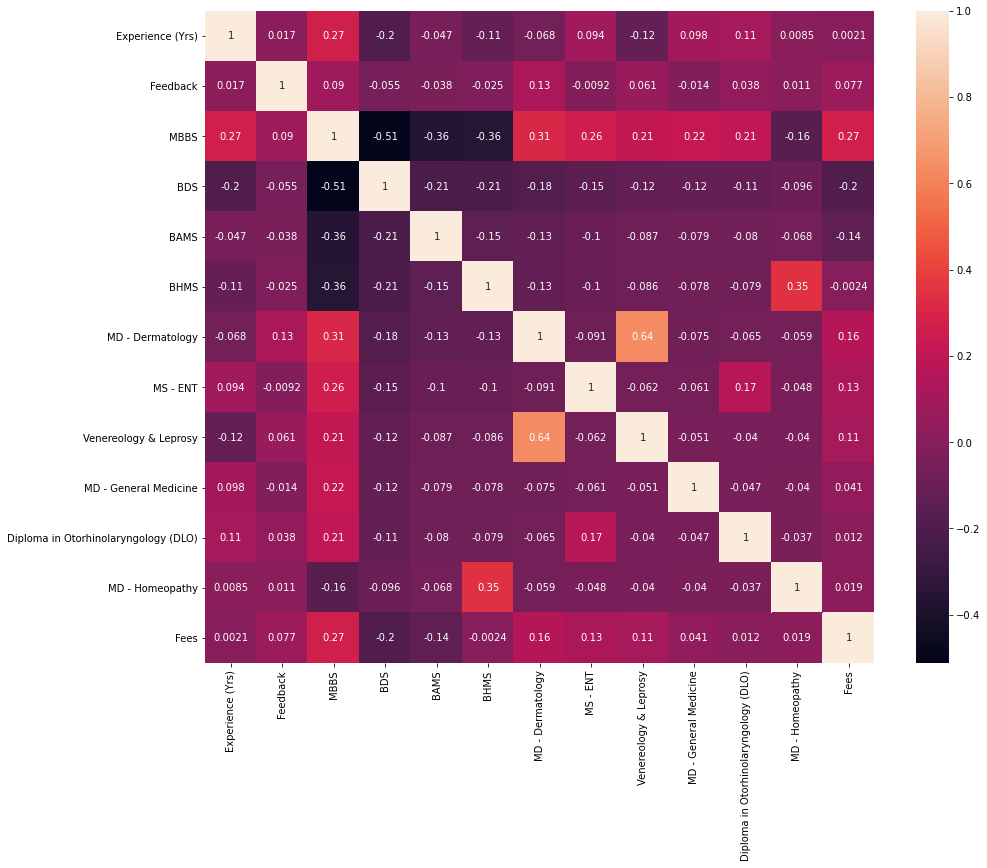

In [51]:
#Checking correlation using heatmap
corr=train.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True)

Text(0.5, 1.0, 'Fees correlation')

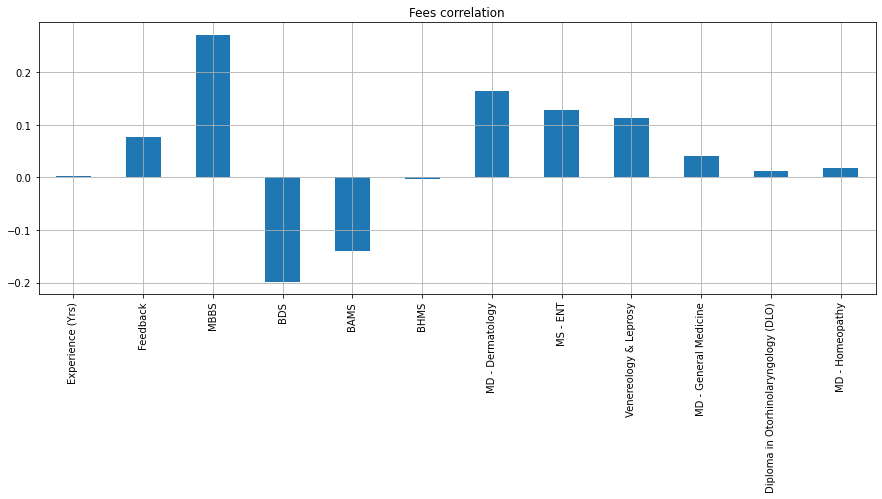

In [52]:
#Checking correlation using barplot
plt.figure(figsize=(15,5))
train.drop('Fees', axis=1).corrwith(train['Fees']).plot(kind='bar', grid=True)
plt.xticks(rotation=90)
plt.title("Fees correlation")

Observation:

Mostly all the columns are positively correlated, except BDS, BAMS, BHMS.

MBBS has high positive correlation.

# Label Encoding

In [53]:
#Transforming categorical data into numerical data for train data
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
lab_col=['Locality']
for lab in lab_col:
    train[lab]=encoder.fit_transform(train[lab])

In [54]:
#Transforming categorical data into numerical data for test data
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
lab_col=['Locality']
for lab in lab_col:
    test[lab]=encoder.fit_transform(test[lab])

In [56]:
# Get dummies for City and Profile in train data
train = pd.get_dummies(train,columns=["City","Profile"],prefix=["City","Profile"])

In [57]:
# Get dummies for City and Profile in test data
test = pd.get_dummies(test,columns=["City","Profile"],prefix=["City","Profile"])

In [58]:
train.head()

,Experience (Yrs),Rating,Locality,Feedback,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_ Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,297,16,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,857,76,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,453,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,69,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,336,4,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Outliers

Experience (Yrs)                           AxesSubplot(0.125,0.816017;0.227941x0.0639831)
Locality                                AxesSubplot(0.398529,0.816017;0.227941x0.0639831)
Feedback                                AxesSubplot(0.672059,0.816017;0.227941x0.0639831)
MBBS                                       AxesSubplot(0.125,0.739237;0.227941x0.0639831)
BDS                                     AxesSubplot(0.398529,0.739237;0.227941x0.0639831)
BAMS                                    AxesSubplot(0.672059,0.739237;0.227941x0.0639831)
BHMS                                       AxesSubplot(0.125,0.662458;0.227941x0.0639831)
MD - Dermatology                        AxesSubplot(0.398529,0.662458;0.227941x0.0639831)
MS - ENT                                AxesSubplot(0.672059,0.662458;0.227941x0.0639831)
Venereology & Leprosy                      AxesSubplot(0.125,0.585678;0.227941x0.0639831)
MD - General Medicine                   AxesSubplot(0.398529,0.585678;0.227941x0.0639831)
Diploma in

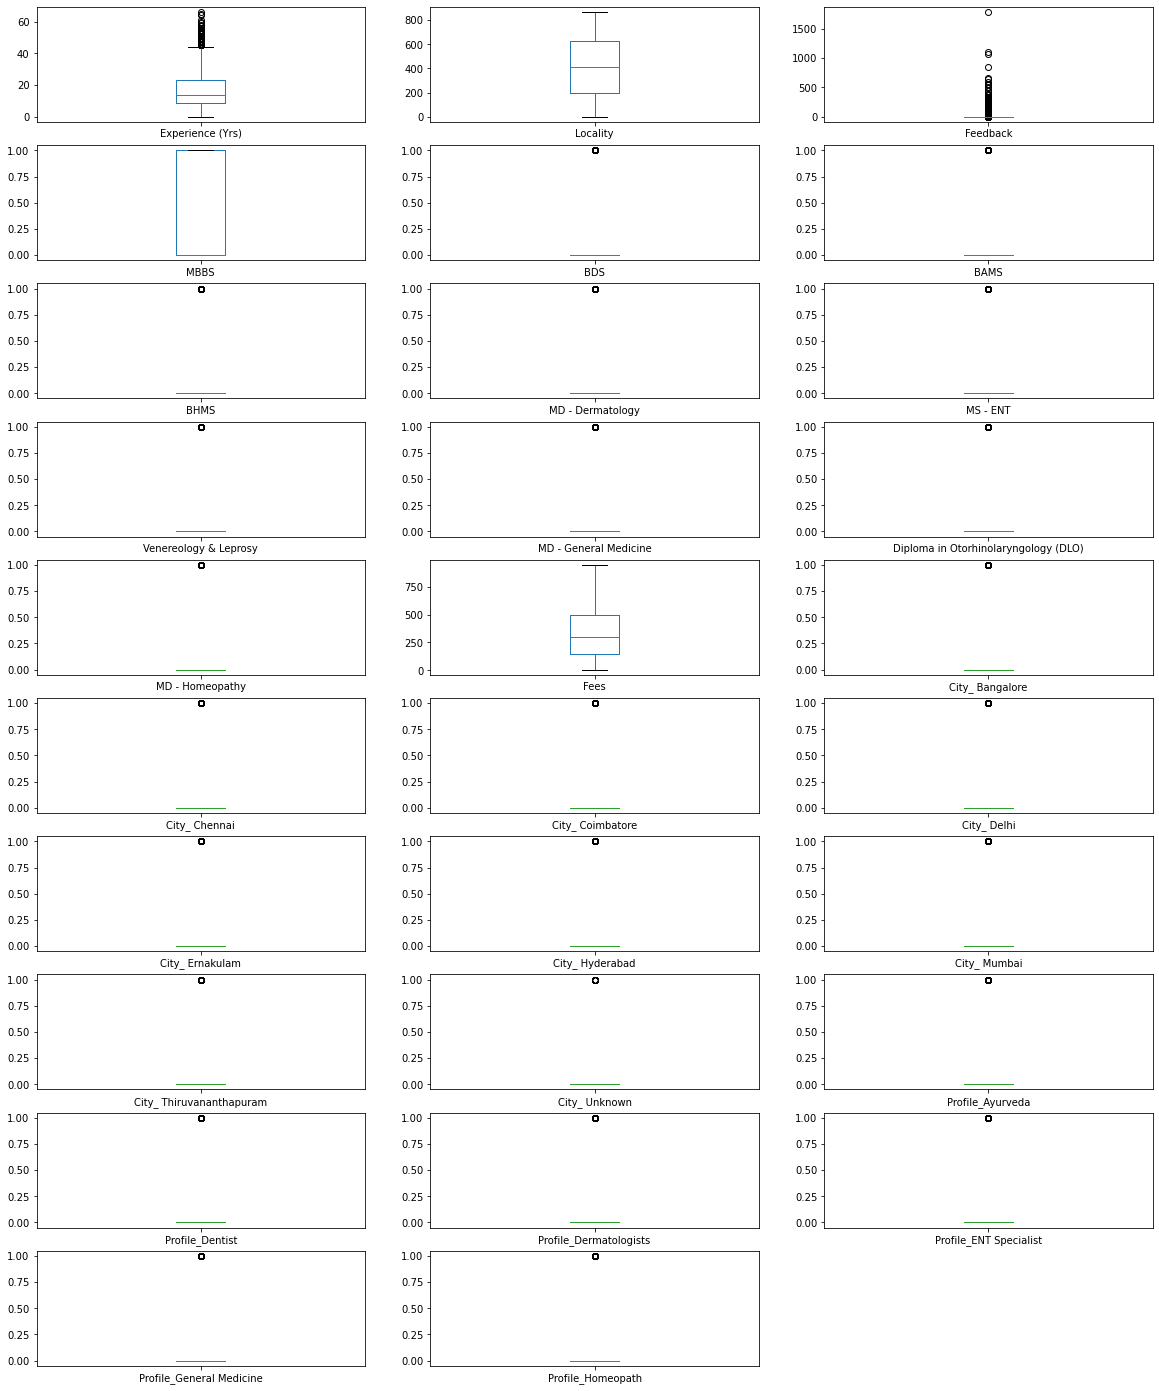

In [61]:
#Visualization of outliers using boxplot
train.plot(figsize=(20,25),kind='box',layout=(10,3),subplots=True)

Observation :

Experience and Feedback have more outliers, other qualification columns have less number of outliers

In [62]:
new_df=train.copy()

In [ ]:
train.skew()

## Reducing Skewness in train data

In [63]:
#Reducing Skewness using square root method
for col in new_df.skew().index:
    if col in new_df.describe().columns:
        if new_df[col].skew()>0.55:
            new_df[col] = np.sqrt(new_df[col])
        if new_df[col].skew()<-0.55:
            new_df[col] = np.cbrt(new_df[col])

In [65]:
new_df.skew()

Experience (Yrs)                         0.082582
Rating                                   0.240670
Locality                                 0.109326
Feedback                                 3.838429
MBBS                                     0.118000
BDS                                      1.293695
BAMS                                     2.229777
BHMS                                     2.261706
MD - Dermatology                         2.639954
MS - ENT                                 3.403459
Venereology & Leprosy                    4.171950
MD - General Medicine                    4.239699
Diploma in Otorhinolaryngology (DLO)     4.581912
MD - Homeopathy                          5.475409
Fees                                     0.245176
City_ Bangalore                          1.416677
City_ Chennai                            2.035059
City_ Coimbatore                         4.816241
City_ Delhi                              1.509849
City_ Ernakulam                          6.000437


Observation :

Skewness are reduced in some columns.

## Removing Skewness in test data

In [66]:
#Reducing Skewness using square root method
for col in test.skew().index:
    if col in test.describe().columns:
        if test[col].skew()>0.55:
            test[col] = np.sqrt(test[col])
        if test[col].skew()<-0.55:
            test[col] = np.cbrt(test[col])

In [67]:
test.skew()

Experience (Yrs)                         0.046070
Rating                                   0.218225
Locality                                 0.036802
Feedback                                 3.789060
MBBS                                     0.029215
BDS                                      1.385625
BAMS                                     2.307450
BHMS                                     2.272114
MD - Dermatology                         2.703626
MS - ENT                                 3.551243
Venereology & Leprosy                    4.376544
MD - General Medicine                    4.141139
Diploma in Otorhinolaryngology (DLO)     4.522393
MD - Homeopathy                          5.396718
City_ Bangalore                          1.414921
City_ Chennai                            2.024439
City_ Coimbatore                         5.045856
City_ Delhi                              1.426066
City_ Ernakulam                          6.203118
City_ Hyderabad                          1.781316


## Saving Data to Excel

In [68]:
new_df.to_excel("Doctor_train_final.xlsx",index=False)
test.to_excel("Doctor_test_final.xlsx",index=False)

### Assigning input and target data

In [69]:
#Assigning input and target data
X=new_df.drop(['Fees'],axis=1)
Y=new_df['Fees']

In [70]:
X.head()

,Experience (Yrs),Rating,Locality,Feedback,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_ Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,4.898979,10,297,4.000000,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.464102,10,857,8.717798,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.000000,0,453,0.000000,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.464102,0,69,0.000000,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.472136,10,336,2.000000,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [71]:
Y.head()

0    10.000000
1    18.708287
2    17.320508
3    15.811388
4    15.811388
Name: Fees, dtype: float64

## Scaling

In [72]:
# from sklearn.preprocessing import OrdinalEncoder
# sc=OrdinalEncoder()
# ScaledX=sc.fit_transform(X)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ScaledX=sc.fit_transform(X)

### Root Mean Squared Log Error

In [73]:
#We are using root mean squared log error
#1 - RMSLE
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

## Predicting Models

In [74]:
#importing libraries for models
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 



In [76]:
from sklearn.metrics import make_scorer
best_rstate=0
accu=0
best_model=[]
best_scorer=0
mod=[DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),SVR()]
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(ScaledX,Y,test_size=0.2,random_state=i)
    for m in mod:
        m.fit(x_train,y_train)
        y_pred = m.predict(x_test)
        tempaccu=score(y_pred,y_test)
        #scorer = make_scorer(score,greater_is_better=True)
        if tempaccu>accu:
            accu=tempaccu
            best_rstate=i
            #best_scorer=scorer
            best_model=m
            print(f"best RMSLE : {accu} found on the random state {best_rstate}, best model is {m}")
            print('************************************************************************************************************')
            
print(f"-----best RMSLE : {accu} found on the random state {best_rstate}, best model is {m}----")

best RMSLE : 0.9108498045959487 found on the random state 1, best model is DecisionTreeRegressor()
************************************************************************************************************
best RMSLE : 0.9455250888526081 found on the random state 1, best model is KNeighborsRegressor()
************************************************************************************************************
best RMSLE : 0.9521520680216372 found on the random state 1, best model is RandomForestRegressor()
************************************************************************************************************
best RMSLE : 0.9545207206911547 found on the random state 1, best model is GradientBoostingRegressor()
************************************************************************************************************
best RMSLE : 0.9552895021467337 found on the random state 2, best model is GradientBoostingRegressor()
***************************************************************

### Train Test Split Method

In [77]:
x_train,x_test,y_train,y_test=train_test_split(ScaledX,Y,test_size=0.2, random_state=126)

## HyperTuning using GridSearchCV

In [78]:
#Grid Search CV for SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
scorer = make_scorer(score,greater_is_better=True)

GCV = GridSearchCV(SVR(),param_grid=parameters,scoring=scorer,n_jobs=-1,cv=5)
GCV.fit(x_train,y_train)
GCV_pred = GCV.predict(sc.transform(x_test))

print("best score is ",score(GCV_pred,y_test))
print("best estimator is ",GCV.best_estimator_)
print("best param is ",GCV.best_params_)

best score is  0.945920894383389
best estimator is  SVR(C=1)
best param is  {'C': 1, 'kernel': 'rbf'}


## Best SVR Model

In [79]:
#Best parameter for SVR
SV=SVR(C=10)
SV.fit(x_train,y_train)
SV_pred=SV.predict(x_test)
print(" Best Score is ",score(y_test, SV_pred))

 Best Score is  0.9509470459510355


# Saving Model

In [80]:
#save the model 
import pickle


filename='Doctor Consulation Fee Model.pkl'
pickle.dump(SV,open(filename,'wb'))


# Checking test data

In [81]:
testing=pd.read_excel('Doctor_test_final.xlsx')
testing.head()

,Experience (Yrs),Rating,Locality,Feedback,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_ Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,5.916080,0,142,0.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,5.567764,0,578,0.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,6.324555,7,212,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.000000,0,373,0.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4.000000,10,231,0.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [82]:
testing.isnull().sum()

Experience (Yrs)                        0
Rating                                  0
Locality                                0
Feedback                                0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
City_ Bangalore                         0
City_ Chennai                           0
City_ Coimbatore                        0
City_ Delhi                             0
City_ Ernakulam                         0
City_ Hyderabad                         0
City_ Mumbai                            0
City_ Thiruvananthapuram                0
City_ Unknown                           0
Profile_Ayurveda                  

In [83]:
#Load the model
fitted_model=pickle.load(open('Doctor Consulation Fee Model.pkl','rb'))

In [84]:
fitted_model

SVR(C=10)

In [85]:
#Prediction over test data
predictions=fitted_model.predict(testing)

In [86]:
predictions

array([14.50313283, 14.50313283, 14.50313283, ..., 14.50313283,
       14.50313283, 14.50313283])

# Conclusion

Did exploratory data analysis by removing columns, seperated Qualification column with most common degree, calculating missing recovered data, label encoding.

Visualized data by univariate and bivariate analysis

Checked correlation and visualized using heatmap and barplot.

Scaled the data using standard scaler method

SVR is the best model for Doctor Consultation Fee Prediction.

Performed Hyperparameter tuning for SVR.

Final score for Doctor Consultation Fee prediction using Root Mean Squared Log Error :

          *   Best Score is  0.95